# House price prediction  
Given the size and number of bedrooms learn a model to predict the price of the house.  
Use Gradient descent and Normal Equations method for Linear Regression.  
Also demostrate the use of LinearRegression from sklearn!

In [6]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# load the data
data_set = pd.read_csv('house_price.csv')
data_set.head(2)

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900


Given the size of the house and the number of bedrooms, we have to predict the price.  
Let's fit a linear regression model to this problem as follows:  
Let's consider the features size and bedrooms as $x_1$ and $x_2$ respectively then we have the following hypothesis function:  
$house\_price = h_\theta(x_1, x_2) = \theta_0 + \theta_1x_1 + \theta_2x_2$  

In [8]:
# let us look at the information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   size      47 non-null     int64
 1   bedrooms  47 non-null     int64
 2   price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [9]:
# look for the missing data in the data-set
data_set.isnull().sum()

size        0
bedrooms    0
price       0
dtype: int64

Luckily we don't have any missing values in our data-set!

# Exploratory Data Analysis

<AxesSubplot:xlabel='price'>

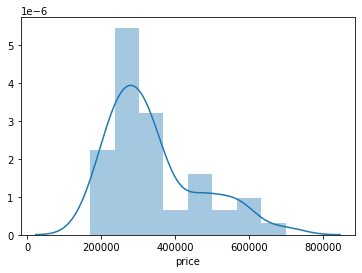

In [10]:
# distribution of prices
sns.distplot(data_set['price'])

<AxesSubplot:xlabel='price'>

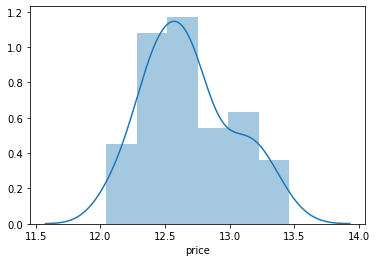

In [11]:
# distribution of prices on log scale
sns.distplot(np.log(data_set['price']))

Log scale plot seems to be better normally distributed

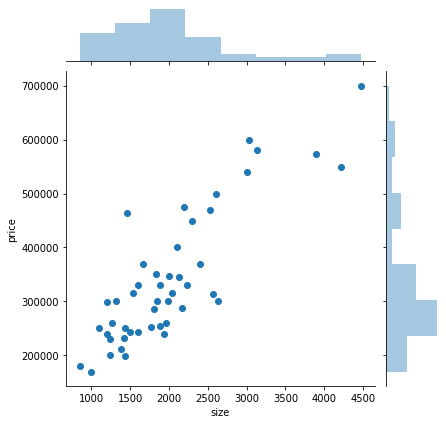

In [12]:
# distribution of prices w.r.t house-size
sns.jointplot(x='size', y='price', data=data_set)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

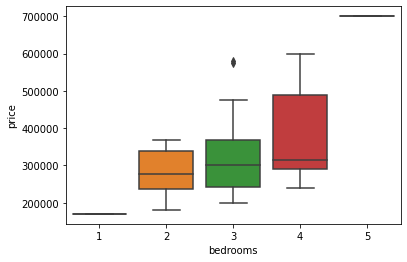

In [13]:
# distribution w.r.t bedrooms
sns.boxplot(x='bedrooms', y='price', data=data_set)

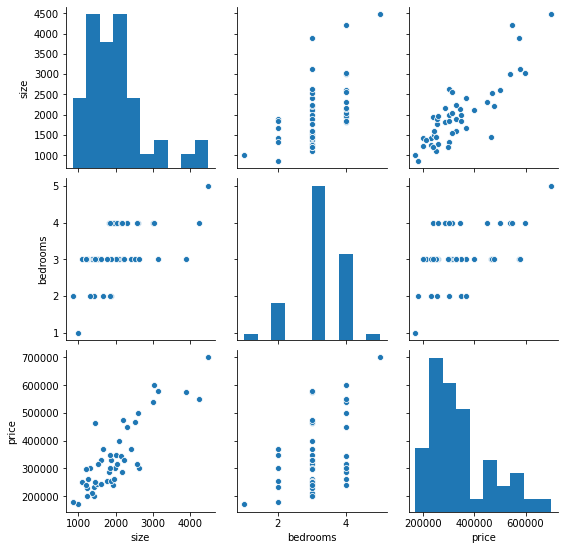

In [14]:
sns.pairplot(data_set)

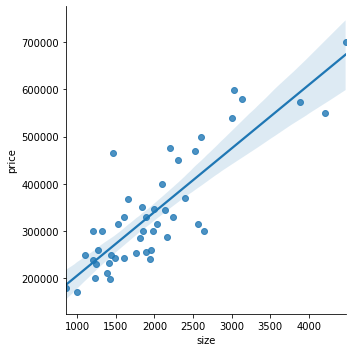

In [15]:
# lmplot price and size
sns.lmplot(x='size', y='price', data=data_set)

## Maximum Likelihood Estimation
Given the model $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2$ and the training set, we want to predict the parameters $\theta_0, \theta_1, \theta_2$ such that our predicted values are as close to the actual value as possible or we want to minimize the root mean square error.  
$RMSE = \sqrt{\frac{1}{m}\sum_{i = 1}^{m} (\hat{y}_i - y_i)^2}$  
where $m$ is the number of traning samples, $n$ is the number of features, $\hat{y}_i$  $y_i$ are the predicted and actual values of the $i^{th}$ training sample.   


## Gradient descent method
We note that minimizing the root mean square error is same as minimizing the normalized mean squared error i.e.  
$J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}_i - y_i)^2$ which is our cost function.  
Now for the gradient descent method we start with some random $(\theta_0, \theta_1, \theta_2)$ and iteratively perform the following:  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2)$  
to reach to the optimum value i.e. the paramters $(\theta_0, \theta_1, \theta_2)$ which minimizes the cost function.  
Now the only thing we need to decide is the learning rate $\alpha$ so we need to perform some analysis.  

If we consider a dummy features $x_0 = 1$ for all training samples then we have the following:  
$\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2) = \frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i - y_i) x_j^i$ where $x_j^i$ denotes the $j^{th}$ feature of $i^{th}$ training sample.  

Now we have the following:  
$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i = 1}^{m} (\theta_0x_0^i + \theta_1x_1^i + \theta_2x_2^i - y_i) x_j^i$  


Specifically we can write as follows:  
$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i) x_0^i$  
$ \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i) x_1^i$  
$ \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + \theta_2x_2^i - y_i) x_2^i$  


Furthermore we can write the expression for $\theta_j$ as follows:  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)x_j^i$ where $\hat{y}_i = \sum_{k=0}^{n} \theta_k x_k^i$

The following function computes the $\hat{y} = \sum_{k=0}^{n} \theta_k x_k$

In [57]:
# computes the value for y_hat given thetas and input x
# assumes that theteas and x can be indexed using zero-based indexing
# and further both thetas and x have the same dimension
def y_hat(thetas, x):
    sum = 0.0 # start with zero sum
    n = len(thetas) # get the number of parameters
    for k in range(n): # iterate through all pair theta_i*x_i
        sum = sum + thetas[k] * x[k]
    return sum # return the computed sum

The following function computes the partial derivative term i.e.  
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_j^i$

In [58]:
# computes the partial derivative term
def partial_derivative(thetas, xs, ys, j):
    sum = 0.0 # store the sum
    m = len(ys) # get the number of samples
    for i in range(m): # iterate through each sample
        x_i = xs.iloc[i] # get the ith training input
        y_i = ys.iloc[i] # get the ith training output
        x_j_i = x_i[j] # get the jth feature of ith training input
        y_hat_i = y_hat(thetas, x_i) # compute the prediction 
        sum = sum + (y_hat_i - y_i) * x_j_i # add the term
    sum = sum / m # take the average
    return sum # return the computed partial derivative

The following function performs a single iteration of the gradient descent method  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)x_j^i$ for all j

In [59]:
# updates every theta - performs a single iteration of gradient descent
# and returns the updated values for thetas
def gradient_descent_iteration(alpha, thetas, xs, ys):
    n = len(thetas) # get the number of features
    updated_thetas = [] # stores the updated thetas
    for j in range(n): # iterate through each feature
        value = thetas[j] - alpha * partial_derivative(thetas, xs, ys, j)
        updated_thetas.append(value) # updated value of theta_j
    # return the updated values of thetas
    return updated_thetas

The following function computes the cost-function i.e.  
$J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} (\theta_0 x_0^i + \theta_1 x_1^i + ... + \theta_n x_n^i - y_i)^2 = \frac{1}{2m} \sum_{i = 1}^{m} (\hat{y}_i - y_i)^2$

In [60]:
def cost_value(thetas, xs, ys):
    sum = 0.0 # stores the sum
    m = len(ys) # get the number of training samples
    for i in range(m): # iterate through each training sample
        x_i = xs.iloc[i] # get the ith training input
        y_i = ys.iloc[i] # get the ith training output
        y_hat_i = y_hat(thetas, x_i) # compute the predicted value
        error = y_hat_i - y_i # compute the error
        sum = sum + (error ** 2) # add the squared-error
    # take the normalized average
    sum = sum / (2 * m)
    # return the computed cost
    return sum

Now we try different-different values for alpha and plot the number of iterations vs the cost and observe the convergence of the cost function to achieve the optimum.  

In [61]:
# as we have now observed that we need a dummy input having values 1 for all data
# so let's go ahead and add that dummy input
data_set['dummy'] = 1
# rearrange the columns for better readability
data_set = data_set[['dummy', 'bedrooms', 'size', 'price']]
# observe the data-set
data_set.head()

,dummy,bedrooms,size,price
0,1,3,2104,399900
1,1,3,1600,329900
2,1,3,2400,369000
3,1,2,1416,232000
4,1,4,3000,539900


In [115]:
# get the input and the outputs from the data-set
x = pd.DataFrame(data_set[['dummy', 'bedrooms', 'size']])
# checkout the finalized input data-frame
print(x.head())
# next we fetch the outputs
y = data_set['price']
# checkout the outputs
print(y.head())

   dummy  bedrooms  size
0      1         3  2104
1      1         3  1600
2      1         3  2400
3      1         2  1416
4      1         4  3000
0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64


An important point to keep in mind before performing the gradient descent is *feature scaling*  
For as of now our features are not well-scaled so we go ahead and scale the features using the mean and the std.  

In [116]:
mu1 = x['bedrooms'].mean()
std1 = x['bedrooms'].std()
mu2 = x['size'].mean()
std2 = x['size'].std()
# scale bedrooms feature
x['bedrooms'] = (x['bedrooms'] - mu1)/std1
# scale the size feature
x['size'] = (x['size'] - mu2)/std2

mu = y.mean()
std = y.std()
# scale y - outputs
y = (y - mu)/std


# preview scaled values
print(x.head())
print(y.head())

   dummy  bedrooms      size
0      1 -0.223675  0.130010
1      1 -0.223675 -0.504190
2      1 -0.223675  0.502476
3      1 -1.537767 -0.735723
4      1  1.090417  1.257476
0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64


You might observe that some of the values are negative for example price are negative, size are negative which doesn't make sense in real-world but remember these are scaled values and not the actual values!

In [117]:
# next for sake of simplicity we rename the columns to zero-based indexing
x.columns = [0, 1, 2] # features will be x[0], x[1], x[2]
x.head()

,0,1,2
0,1,-0.223675,0.130010
1,1,-0.223675,-0.504190
2,1,-0.223675,0.502476
3,1,-1.537767,-0.735723
4,1,1.090417,1.257476


Now let's split our data-set into training and testing samples!

In [118]:
# next we split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 3)
(10, 3)


So we have 37 training samples and 10 testing samples.

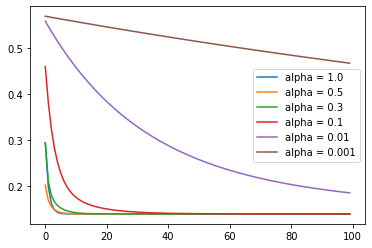

In [120]:
alphas = [1.0, 0.5, 0.3, 0.1, 0.01, 0.001] # choices for learning rate
for alpha in alphas: # iterate through each alpha
    cost = [] # stores the cost after each iteration
    thetas = [0, 0, 0] # start with 0 value for each parameters
    iterations = 100 # the max. number of iterations we wish to perform
    for i in range(iterations):
        # make a single iteration
        thetas = gradient_descent_iteration(alpha, thetas, X_train, y_train)
        ith_cost = cost_value(thetas, X_train, y_train) # compute the cost
        cost.append(ith_cost) # append the ith cost
    plt.plot(range(iterations), cost, label='alpha = {}'.format(alpha))
plt.legend() # set the legend
plt.show() # display the plot

As evident from the above plot gradient descent coverges at different rate with different values of the learning rate ($\alpha$). It seems like $\alpha = 1.0$ converges very fast whereas $\alpha = 0.001$ converges very slowly.  
For our model $\alpha = 0.1$ seems to be a good fit for the learning rate and we will continue our with this learning rate

In [122]:
# now let's find out the parameters with alpha = 0.1
alpha = 0.1 # chooses from graphical analysis
thetas = [0, 0, 0] # start with some random values
iterations = 100 # max. number of iterations we wish to perform
for i in range(iterations):
    thetas = gradient_descent_iteration(alpha, thetas, X_train, y_train)
print(thetas) # view the parameters

[0.019124627999546347, 0.0067173350410786765, 0.8817491103330048]


In [145]:
# now let's make predictions
predictions = []
residual_errors = []
n = len(y_test)
for i in range(n):
    x_i = X_test.iloc[i]
    y_i = y_test.iloc[i]
    y_hat_i = y_hat(thetas, x_i)
    predictions.append(y_hat_i)
    error = y_hat_i - y_i
    residual_errors.append(error)

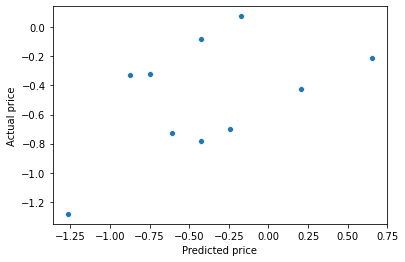

In [146]:
# let's look at the plot of actual vs. predicted values
sns.scatterplot(predictions, y_test)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

In [147]:
# let's look at the mean of the residual error and RMSE
print(pd.DataFrame(residual_errors))
print("Mean of residual errors := {}".format(np.mean(residual_errors)))
print("Root Mean Squared Error := {}".format(np.sqrt(np.mean(np.power(residual_errors, 2)))))

          0
0  0.116069
1  0.458223
2  0.866033
3 -0.246470
4  0.017986
5 -0.342872
6 -0.539565
7  0.357344
8 -0.422446
9  0.632603
Mean of residual errors := 0.08969065243250444
Root Mean Squared Error := 0.4636333384475924


The mean of the residual errors is close to 0.1 (close enough to zero) and the RMSE is also reasonable!  
Since our test-set is small let's also manually compare the predicted and actual prices.  

In [148]:
# re-scale the values to actual scale
out = {'actual_price': [], 'predicted_price': []}
predictions = np.array(predictions)
out['predicted_price'] = (predictions * std) + mu
out['actual_price'] = (y_test * std) + mu
out_df = pd.DataFrame(out)
print(out_df)

    actual_price  predicted_price
35      249900.0    264413.305894
20      252900.0    310196.183608
42      314000.0    422288.729568
30      349900.0    319081.423610
44      179900.0    182148.998445
1       329900.0    287027.272765
43      299000.0    231532.875535
22      242900.0    287582.216737
16      299900.0    247077.443204
39      287000.0    366100.652373


The predicted values are not much but sufficiently close to the actual prices!

# Normal Equation Method
If we have the following linear regression model  
$\hat{y} = \sum_{i = 0}^{n} \theta_i x_i$ being $x_0 = 1$ for all training samples.  
then an optimal value of $\theta = [\theta_0, \theta_1, ..., \theta_n]$ can be computed as follows:  
$\theta = (X^TX)^{-1}X^Ty$

In [149]:
# let's fetch the input and output from the data-set
x = data_set[['dummy', 'size', 'bedrooms']]
y = np.log(data_set['price'])
# append the dummy-input
print(x.head())
print(y.head())

   dummy  size  bedrooms
0      1  2104         3
1      1  1600         3
2      1  2400         3
3      1  1416         2
4      1  3000         4
0    12.898970
1    12.706545
2    12.818552
3    12.354493
4    13.199139
Name: price, dtype: float64


For the normal-equation method we need no feature scaling and we can simply proceed further for evaluating the value of theta.  Let's now split the data-set into training and testing.  

In [150]:
# split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 3)
(10, 3)


In [151]:
# get the x and the y
x = X_train
y = y_train
# get the transpose
xT = x.T
# compute the values of thetas
thetas = np.dot(np.dot(np.linalg.inv(np.dot(xT, x)), xT), y)
print(thetas)

[1.19108520e+01 3.55026346e-04 1.93179922e-02]


In [152]:
# make predictions
predictions = []
length = len(y_test)
for i in range(length):
    x = X_test.iloc[i]
    pred = np.dot(thetas, x.T)
    predictions.append(pred)
predictions

[12.478978825888722,
 12.596137519982511,
 12.899476588792433,
 12.602381424656777,
 12.25197042141263,
 12.536848120244139,
 12.394837581948638,
 12.538268225627094,
 12.418122751218366,
 12.75569091876824]

<AxesSubplot:ylabel='price'>

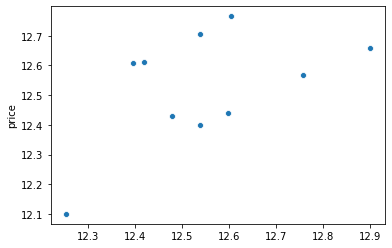

In [153]:
# plot the predicted vs. actual values
sns.scatterplot(predictions, y_test)

In [154]:
# compute the stats of our prediction
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.17353087502412656


In [155]:
# sample prediction on last item in our data-set
x = [1, 1203, 3]
test = thetas[0] * x[0] + thetas[1] * x[1] + thetas[2] * x[2]
predicted_cost = np.exp(test)
print(predicted_cost)

241808.81227698294


Actual house price for (1203, 3) is 239500 and predicted price is 241808 which is quite closed to the actual house price!

In [156]:
# let's manually have a look at difference between the predicted and actual value
# here we have small data-set so we can manually observe 
# otherwise visual representation is always there
residual_errors = (predictions - y_test)
print(residual_errors)
print("Residual error mean: {}".format(np.mean(residual_errors)))

35    0.050163
20    0.155388
42    0.242328
30   -0.163021
44    0.151814
1    -0.169697
43   -0.213361
22    0.137863
16   -0.193082
39    0.188453
Name: price, dtype: float64
Residual error mean: 0.01868487818150406


The mean of the residual errors is quite close to zero!

# Python's built in LinearRegression from sklearn

In [157]:
# let's fetch the input and output from the data-set
x = data_set[['size', 'bedrooms']]
y = np.log(data_set['price'])
# append the dummy-input
print(x.head())
print(y.head())

   size  bedrooms
0  2104         3
1  1600         3
2  2400         3
3  1416         2
4  3000         4
0    12.898970
1    12.706545
2    12.818552
3    12.354493
4    13.199139
Name: price, dtype: float64


In [158]:
# split the data-set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(37, 2)
(10, 2)


In [159]:
# create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [160]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [161]:
# make predictions
predictions = model.predict(X_test)
print(predictions)

[12.47897883 12.59613752 12.89947659 12.60238142 12.25197042 12.53684812
 12.39483758 12.53826823 12.41812275 12.75569092]


<AxesSubplot:ylabel='price'>

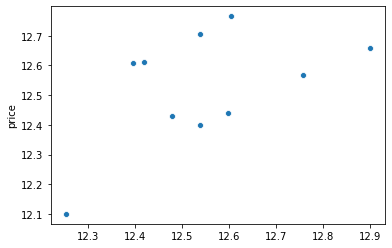

In [162]:
# plot the predicted vs. actual values
sns.scatterplot(predictions, y_test)

In [163]:
# compute the stats of our prediction
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.17353087502413403


In [164]:
# sample prediction on last item in our data-set
x = [1, 1203, 3]
test = thetas[0] * x[0] + thetas[1] * x[1] + thetas[2] * x[2]
predicted_cost = np.exp(test)
print(predicted_cost)

241808.81227698294


Actual house price for (1203, 3) is 239500 and predicted price is 241808 which is quite closed to the actual house price!

In [165]:
# let's manually have a look at difference between the predicted and actual value
# here we have small data-set so we can manually observe 
# otherwise visual representation is always there
residual_errors = (predictions - y_test)
print(residual_errors)
print("Residual error mean: {}".format(np.mean(residual_errors)))

35    0.050163
20    0.155388
42    0.242328
30   -0.163021
44    0.151814
1    -0.169697
43   -0.213361
22    0.137863
16   -0.193082
39    0.188453
Name: price, dtype: float64
Residual error mean: 0.01868487818152751


As we can see that sklearn's linear-regression gives us the same results as we have for the normal-equations method.  

# ThankYou!